# UILC

Implementation Vaildation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")


In [2]:
from uilc import PositionArray, utils

## ESC

Extended Sparrow Criterion


In [3]:
from uilc.methods import esc


### Linear 

In [4]:
# Optical and geometrical system parameter
s = 3
h = 0.3
Nx, Ny = 4, 5

lamber_pattern = lambda d: utils.radiation.lambertian(0, np.sqrt(d), s, h)

In [5]:
#Linear pattern
# Construct Array
# case 1
coef_x, coef_y = esc.coefficient(s, Nx, Ny, shape="L")

esc_xarry = h*coef_x * utils.misc.csym_index(Nx)
esc_yarry = h*coef_y * utils.misc.csym_index(Ny)
esc_array_linear = PositionArray.from_arrays(esc_xarry, esc_yarry)

# case 2
esc_array_linear = h*esc.array(s, Nx, Ny, shape="L")

`PositionArray` provides useful routine and properties for convinences in manipulating sources on plane.

generators
* `from_arrays()`: Class generator using two x, y coordinate 1d arrays.
* `from_meshgrid()`: Class generator using mesh grid arrays.
* `uniform()`: Uniform distributed sources of 1D and 2D.
* `uniform_fill()`: Uniformly fill the given area with $N_x \times N_y$ sources.

methods
* `intensity_on()`: Calculate radiation propagation of the given plane with propagation function.

properties.
* `area`: Calculate the given array area.

In [6]:
# Automatic are calculation
Wx, Wy = esc_array_linear.area

In [7]:
(X, Y), extent_xy =  utils.misc.plot_xy_mesh([-Wx, Wx, -Wy, Wy], (0.7, 0.7), (400, 400))

In [8]:
# Intensity calcualtion
esc_Z_linear = esc_array_linear.intensity_on((X,Y), lamber_pattern)

In [20]:
source_radi = lambda d: utils.radiation.gaussian(0, np.sqrt(d), 0.04)
esc_source_linear = esc_array_linear.intensity_on((X,Y), source_radi)

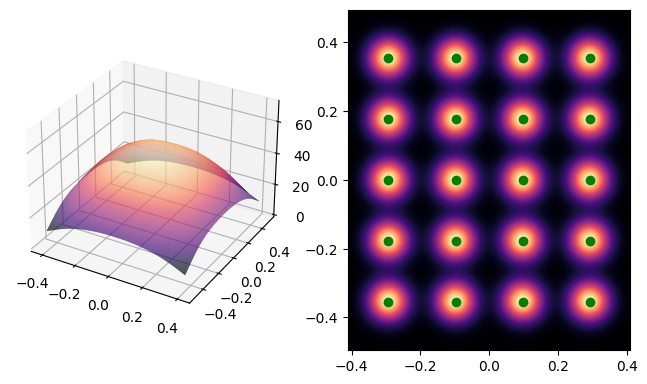

In [21]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot_surface(X, Y, esc_Z_linear, rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax1.set_zlim([0, esc_Z_linear.max()*1.4])
ax2.imshow(
    esc_source_linear,
    extent=extent_xy, cmap='magma')
ax2.scatter(*esc_array_linear.to_meshgrid(), c="g")
plt.show()


In [22]:
Max = esc_Z_linear.max()
print("Max:{}, Min: {}, Sig: {}".format(Max/Max, esc_Z_linear.min()/Max, esc_Z_linear.std()/Max))

Max:1.0, Min: 0.1999970909514036, Sig: 0.20062615868902806


### Recatangular

In [2]:
esc_array_rectangular = h* esc.array(s, Nx, Ny, shape="R")

NameError: name 'h' is not defined

In [25]:
Wx, Wy = esc_array_rectangular.area
(X, Y), extents_xy = utils.misc.plot_xy_mesh((-Wx, Wx, -Wy, Wy), (0.7, 0.7), (400, 400))
# Intensity calcualtion
esc_Z_rectangular = esc_array_rectangular.intensity_on((X,Y), lamber_pattern)
esc_source_rectangular = esc_array_rectangular.intensity_on((X,Y), source_radi )

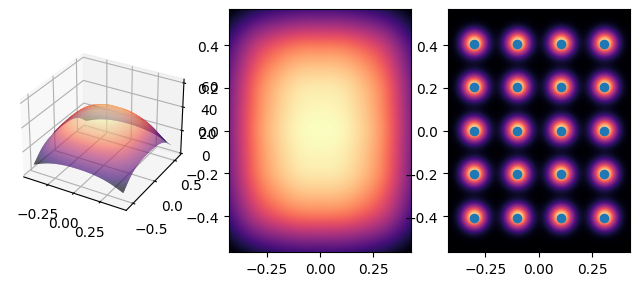

In [26]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.plot_surface(X, Y, esc_Z_rectangular, rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax1.set_zlim([0, 1.4*esc_Z_rectangular.max()])

ax2.imshow(esc_Z_rectangular, cmap='magma', extent= extents_xy) 
ax3.imshow(esc_source_rectangular, cmap='magma', extent= extents_xy)
ax3.scatter(*esc_array_rectangular.to_meshgrid())

plt.show()

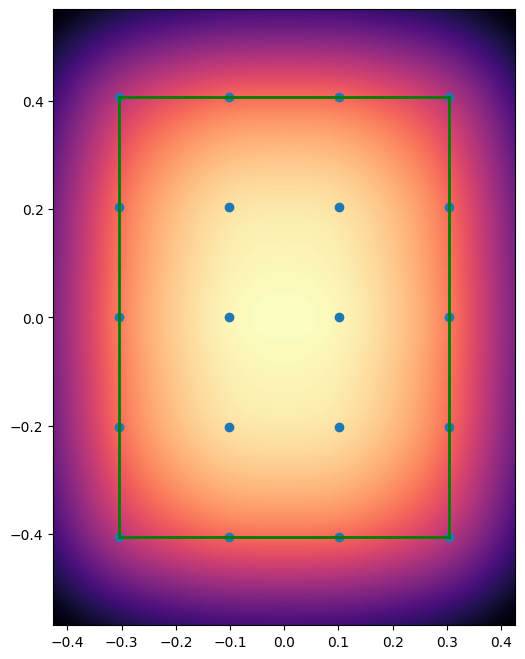

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
for ps in utils.misc.rectangle_line_points(Wx, Wy):
    ax.plot(ps[0], ps[1], 'g-', linewidth=2)
ax.imshow(esc_Z_rectangular, cmap='magma', extent= extents_xy)
ax.scatter(*esc_array_rectangular.to_meshgrid())
plt.show()

## Fill a given area $W_x \times W_y$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")


In [4]:
from uilc.methods import esc
from uilc import utils, methods, PositionArray

In [5]:
s = 4
h = 0.3
Wx, Wy = 0.7, 0.5
lamber_pattern = lambda d: utils.radiation.lambertian(0, np.sqrt(d), s, h)

In [6]:
esc._rectangular_nmax(s, W=[Wx, Wy], H=h, threshold=0.1, permit_exceed=True)

(20, 5, 4, False)

In [7]:
esc._rectangular_nmax(s, W=[Wx, Wy], H=h, threshold=0.3, permit_exceed=False)

(12, 4, 3, False)

---

In [8]:
N_linear_per= esc.nmax_for_region(s, [Wx, Wy], h, shape="L")
N_linear= esc.nmax_for_region(s, [Wx, Wy], h, shape="L", permit_exceed=False)
N_rect_per = esc.nmax_for_region(s, W=[Wx, Wy], H=h, shape = "R" ,threshold=0.3, permit_exceed=True) 
N_rect = esc.nmax_for_region(s, W=[Wx, Wy], H=h, shape= "R", threshold=0.3, permit_exceed=False) 
arrays = [
    h* esc.array(s, *N_linear_per[1:3], shape="L"),
    h* esc.array(s, *N_linear[1:3], shape="L"),
    PositionArray.uniform_fill((Wx, Wy), (N_linear_per[1:3])),
    h* esc.array(s, *N_rect_per[1:3], shape="R"),
    h* esc.array(s, *N_rect[1:3], shape="R"),
    PositionArray.uniform_fill((Wx, Wy), (N_rect_per[1:3])),
]
array_legends =[
    ["Linear_permit_exceed"],
    ["Liner"],
    ["Uniform"],
    ["Rect_permit_exceed"],
    ["Rect"],
    ["Unirom, rect"]
]

In [9]:
print(N_rect)
print(N_rect_per)

(12, 4, 3, False)
(20, 5, 4, True)


In [10]:
(X, Y), extent_xy = utils.misc.plot_xy_mesh([-Wx/2, Wx/2, -Wy/2, Wy/2] , (1, 1), (400, 400))
intensity_map = [ array.intensity_on((X,Y), lamber_pattern) for array in arrays]
intensity_ceiling = [utils.misc.data_ceiling(intensity, 10) for intensity in intensity_map]

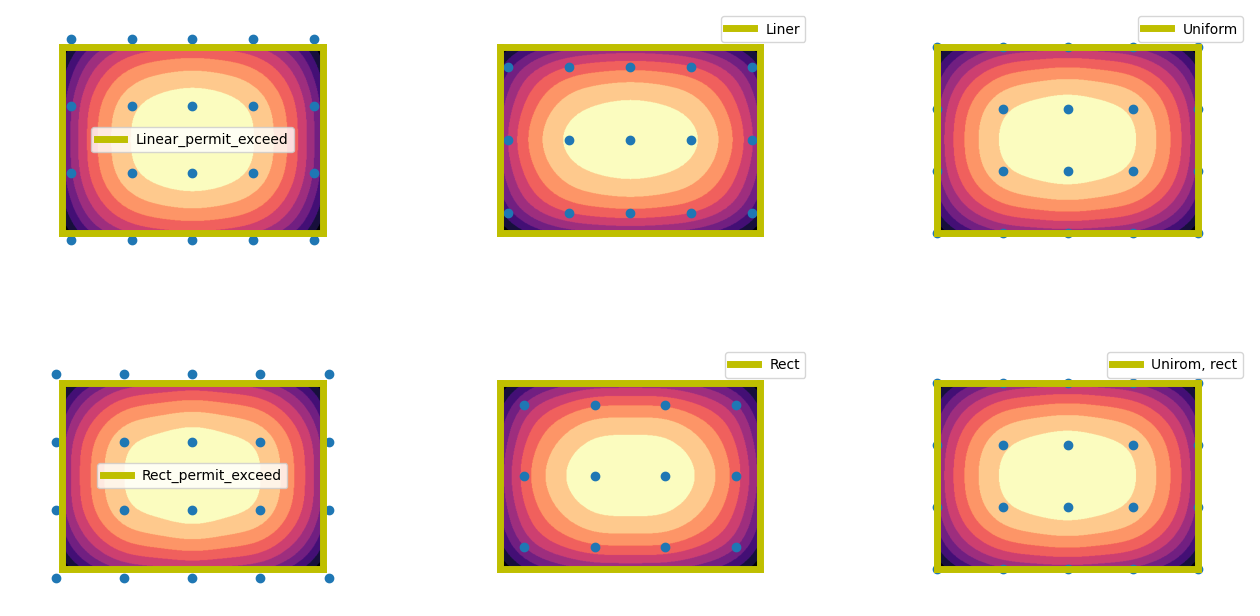

In [11]:
fig = plt.figure(figsize=(16,8))
axs = [  fig.add_subplot( 2, 3, 1),
         fig.add_subplot( 2, 3, 2),
         fig.add_subplot( 2, 3, 3),
         fig.add_subplot( 2, 3, 4),
         fig.add_subplot( 2, 3, 5),
         fig.add_subplot( 2, 3, 6),
      ]
for i, ax in enumerate(axs):
    ax.set_axis_off()
    ax.set_xlim([-0.7*Wx, 0.7*Wx])
    ax.set_ylim([-0.7*Wy, 0.7*Wy])
    ax.imshow(intensity_ceiling[i], cmap='magma', extent = extent_xy)
    for ps in utils.misc.rectangle_line_points(Wx, Wy):
        ax.plot(ps[0], ps[1], 'y-', linewidth=5)
    ax.scatter(*arrays[i].to_meshgrid())
    ax.legend(array_legends[i])
#ax_test.set_xlim(0, Wx)
#ax_test.set_ylim(0, Wy)
plt.show()

In [12]:
for array in intensity_map:
    print(f"Mean: {array.mean()/array.max():0.4}, Emin/Emax: {array.min()/array.max():.4}, std/Emax: {array.std()/array.max():.4}")

Mean: 0.8639, Emin/Emax: 0.5568, std/Emax: 0.09866
Mean: 0.8224, Emin/Emax: 0.4658, std/Emax: 0.1165
Mean: 0.8669, Emin/Emax: 0.5736, std/Emax: 0.09157
Mean: 0.8952, Emin/Emax: 0.6517, std/Emax: 0.07404
Mean: 0.8014, Emin/Emax: 0.4089, std/Emax: 0.1322
Mean: 0.8669, Emin/Emax: 0.5736, std/Emax: 0.09157


## Non-Heuristhic Methods

### Boundary-Matching

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")

In [138]:
from uilc import PositionArray, utils, methods
from uilc.methods import bc, esc

In [141]:
s = 1
h = 0.1
Wx, Wy = 0.6, 0.4
lamber_pattern = lambda d: utils.radiation.lambertian(0, np.sqrt(d), s, h)

R,Q,P region

Text(0.12152667786309404, 0.1, '$y_{e1}$')

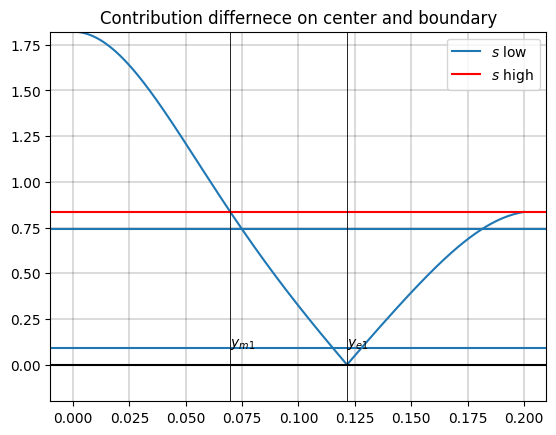

In [142]:
x = np.linspace(0, Wy/2, 300)
y = bc._D_f(x/h, Wy/h, s)
ye_1 = bc.get_xe(s, Wy, h)
ym_1 = bc.get_xm(s, Wy, h, ye_1)
ye_2 = bc.get_xe(10*s, Wy, h)
ym_2 = bc.get_xm(10*s, Wy, h, ye_2)

#------------------------
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Contribution differnece on center and boundary")
ax.plot(x, np.abs(y))
#ax.plot(x, np.abs(bc._D_f(x/h, Wy/h, 10*s)))
ax.set_ylim(-0.2, np.abs(y).max())
ax.axhline(y.max(), c="r")
ax.axhline(0, c="black")
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.legend(["$s$ low", "$s$ high"])

# --- 
sample_d = 0.075
alpha = Wy/h
eps =  h*(bc._D_f(ym_1/h, alpha, s) - bc._D_f(sample_d/h, alpha, s))
l = h*(bc._D_f(alpha/2, alpha, s)) - eps

ax.axhline(l)
ax.axhline(-bc._D_f(sample_d/h, alpha, s))

ax.vlines([ym_1, ye_1], -0.2, np.abs(y).max(), linewidth = 0.6, colors="black")
#ax.vlines([ym_2, ye_2], -0.2, np.abs(y).max(), colors="y")
ax.text(ym_1, 0.1, "$y_{m1}$")
ax.text(ye_1, 0.1, "$y_{e1}$")
#ax.text(ym_2, 0.2, "$y_{m2}$")
#ax.text(ye_2, 0.2, "$y_{e2}$")

1. $q-r$ corresponding sources.
2. $p -r$ 1 to N sources 

In [166]:
arr = np.arange(10)*0.123
(arr[(arr < 0.8) & (arr > 0.3)])

array([0.369, 0.492, 0.615, 0.738])

In [163]:
np.where((arr < 0.8) & (arr > 0.3))

(array([3, 4, 5, 6]),)

In [143]:
xe = bc.get_xe(s, Wx, h)
ye = bc.get_xe(s, Wy, h)
xm = bc.get_xm(s, Wx, h, xe)
ym = bc.get_xm(s, Wy, h, ye)
print(f"X axis: {xm}, {xe}")
print(f"Y axis: {ym}, {ye}")

X axis: 0.07491569155679843, 0.17375885722490325
Y axis: 0.06976637959805375, 0.12152667786309404


In [144]:
rq_array=bc.fill_rq(s, Wx, h, threshold = 0, method = "uniform")
rq_array

array([-0.08687943,  0.08687943])

In [145]:
rq_xarr = bc.fill_rq(s, Wx, h, threshold = 0.1, method="esc")
rq_yarr = bc.fill_rq(s, Wy, h, threshold = 0.1, method="esc")

bc_xarr = np.sort(bc.bc_expansion(rq_xarr, s, Wx, h))
bc_yarr = np.sort(bc.bc_expansion(rq_yarr, s, Wy, h))


In [146]:
bc_arr = PositionArray.from_arrays(bc_xarr, bc_yarr)

In [147]:
p_Wx, p_Wy = bc_arr.area
(p_X, p_Y), p_extents_xy = utils.misc.plot_xy_mesh((-Wx, Wx, -Wy, Wy), (0.5, 0.5), (400, 400))
# Intensity calcualtion
intensity_bc = bc_arr.intensity_on((p_X,p_Y), lamber_pattern)

0.6 0.4 0.1
[-0.3, 0.3, -0.2, 0.2]


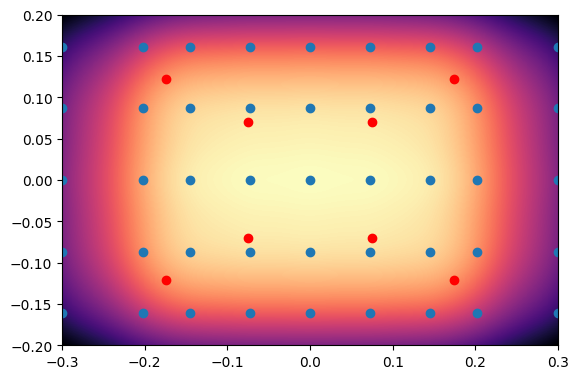

In [150]:
plt.imshow(intensity_bc, cmap="magma", extent= p_extents_xy)
plt.scatter(*bc_arr.to_meshgrid())
plt.scatter(
    [xm, xm, -xm, -xm, xe, xe, -xe, -xe], 
    [ym, -ym, ym, -ym, ye, -ye, ye, -ye], c="r")
print(Wx, Wy, h)
print(p_extents_xy)


(0.0, 1.2)

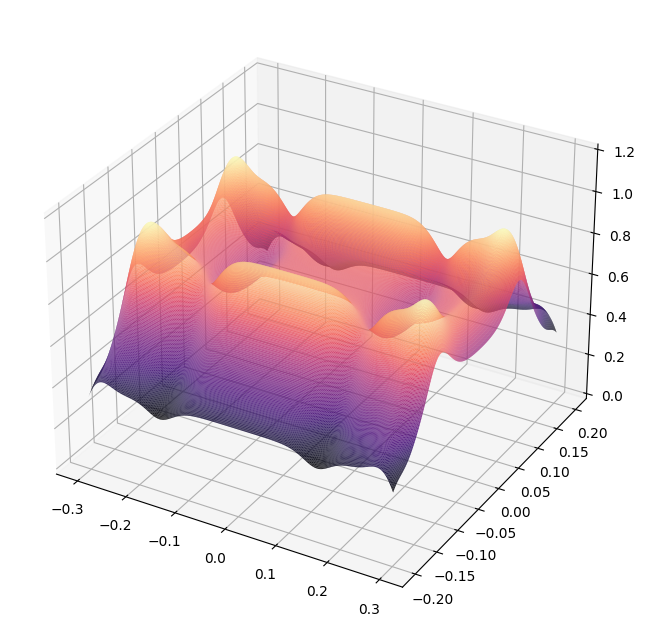

In [136]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot( projection="3d")
ax.plot_surface(p_X, p_Y, intensity_bc/intensity_bc.max(), rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax.set_zlim(0, 1.2)

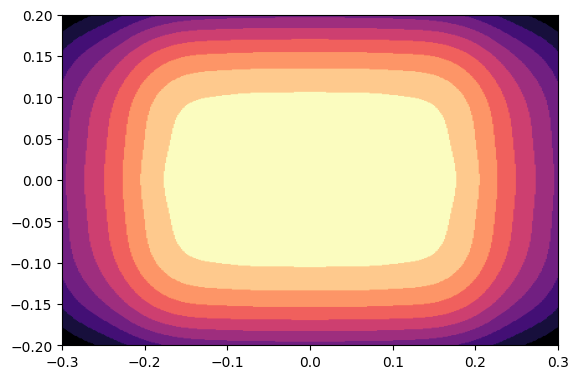

In [151]:
plt.imshow(utils.misc.data_ceiling(intensity_bc, 10), cmap="magma", extent= p_extents_xy)

### Power Weight

#### KDE Sampling


#### Inverse Transform Sampling